In [21]:
# Jordan Marshall - 18256716 | Marcin Sek - 18254187
# [Runs without error]
# [Link to original code if used]

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


<AxesSubplot:ylabel='Frequency'>

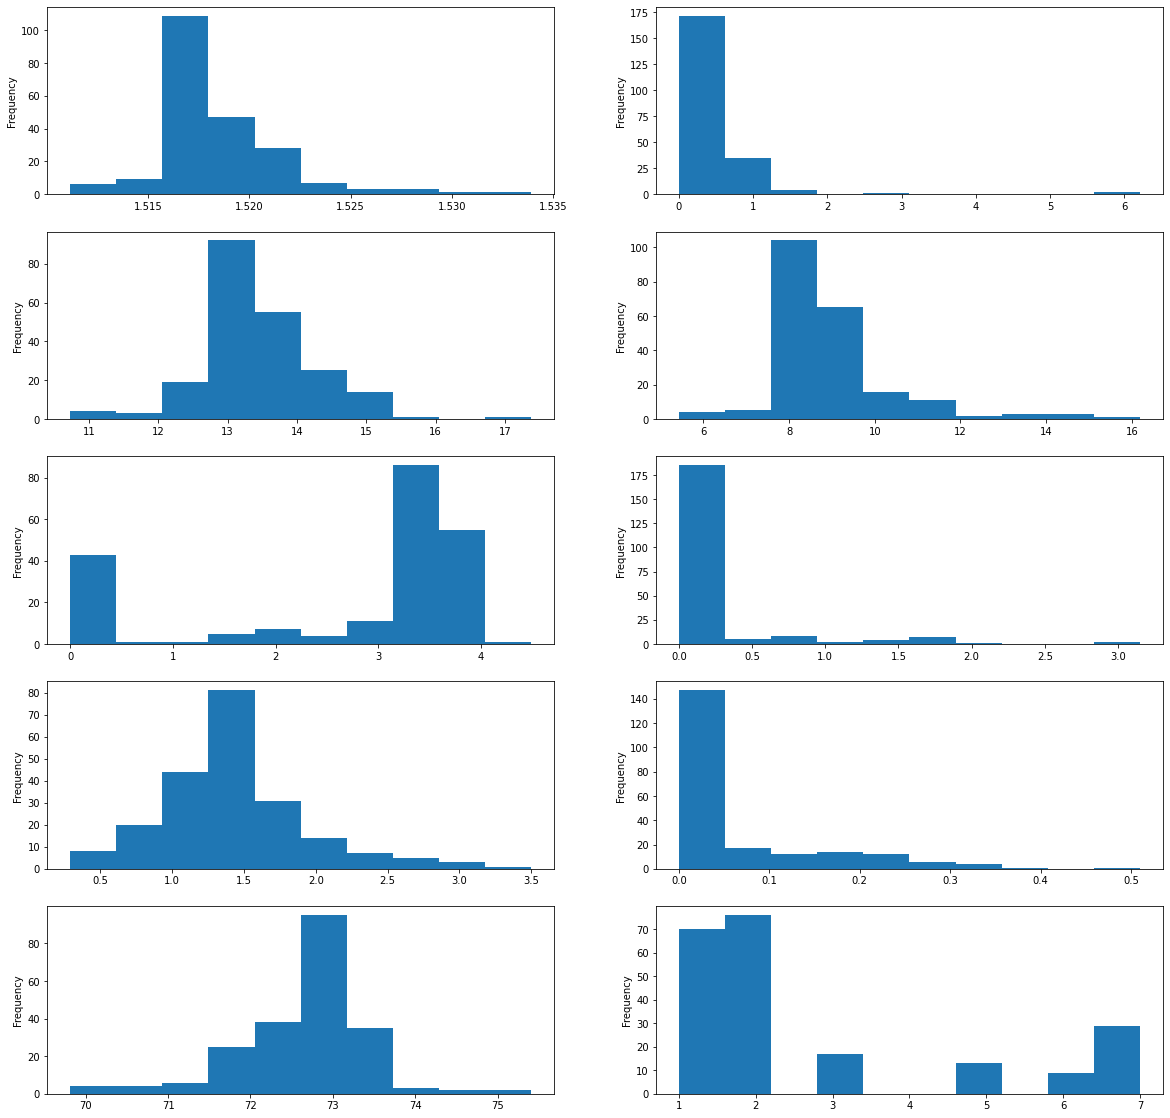

In [22]:
from pandas import read_csv
import matplotlib.pyplot as plt

# load the dataset
path = 'glass.csv'
df = read_csv(path, header=0)
print(df)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

df.RI.plot.hist(ax=axes[0,0],)
df.Na.plot.hist(ax=axes[1,0])
df.Mg.plot.hist(ax=axes[2,0])
df.Al.plot.hist(ax=axes[3,0])
df.Si.plot.hist(ax=axes[4,0])
df.K.plot.hist(ax=axes[0,1])
df.Ca.plot.hist(ax=axes[1,1])
df.Ba.plot.hist(ax=axes[2,1])
df.Fe.plot.hist(ax=axes[3,1])
df.Type.plot.hist(ax=axes[4,1])

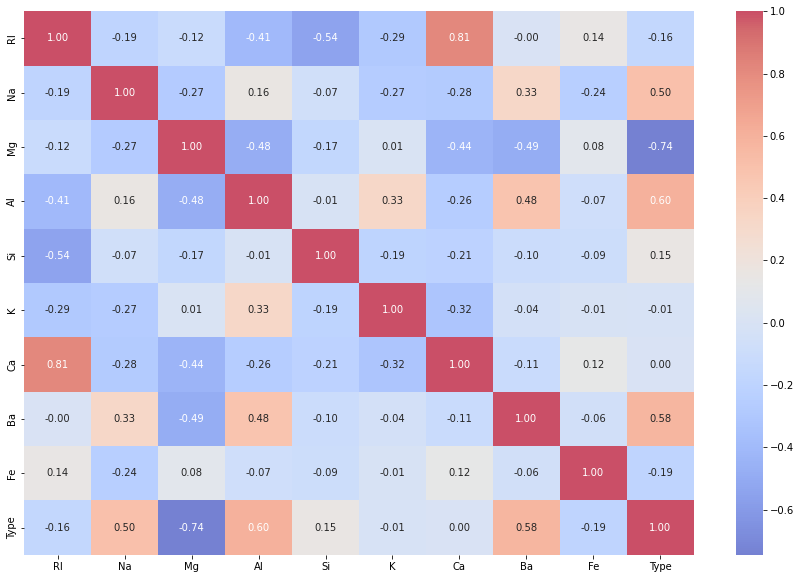

In [23]:
import seaborn as sns

corr_mat=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, fmt='.2f', alpha=0.7, cmap='coolwarm')
plt.show()

DESC
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000

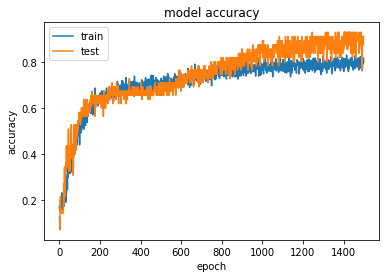

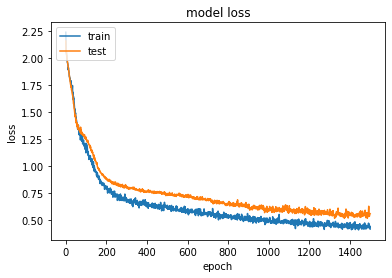

Test Accuracy: 0.826
Predicted: [[0. 0. 0. 0. 0. 0. 1. 0.]] (class=6)


In [24]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from numpy import argmax

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import normalize, to_categorical

print("DESC")
print(df.describe())
print("ISNA")
print(df.isna().sum())
print("DUPS")
print(df[df.duplicated()])

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')
X = normalize(X)

# encode strings to integer
y = y.astype('int32')

# Class balancing
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

sc = StandardScaler()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(80, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='softmax'))

# compile the model
adam = Adam()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.15, epochs=1500, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))
